In [1]:
import tensorflow as tensorflow
from tensorflow import keras

2022-09-30 08:01:28.665184: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
fashion_mnist= keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test)= fashion_mnist.load_data()

### Relevant
I need to scale the pixels because I will be using the Gradient Descent technique as optimizer

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

### Classification MLP with two hidden layers

In [9]:
# Create the model
model= keras.models.Sequential([
    keras.layers.Flatten(input_shape= [28, 28]),
    keras.layers.Dense(300, activation= 'relu'),
    keras.layers.Dense(100, activation= 'relu'),
    keras.layers.Dense(10, activation= 'softmax'),
])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compile the model
model.compile(
    loss= "sparse_categorical_crossentropy",
    optimizer= "sgd",
    metrics= "accuracy"
)

In [15]:
history= model.fit(
    X_train, y_train, epochs= 30, validation_data= (X_valid, y_valid)
)

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7107 - accuracy: 0.7661 - val_loss: 0.5183 - val_accuracy: 0.8214
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4857 - accuracy: 0.8299 - val_loss: 0.4427 - val_accuracy: 0.8480
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4410 - accuracy: 0.8440 - val_loss: 0.4170 - val_accuracy: 0.8586
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4129 - accuracy: 0.8549 - val_loss: 0.4144 - val_accuracy: 0.8556
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3934 - accuracy: 0.8590 - val_loss: 0.3924 - val_accuracy: 0.8638
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3775 - accuracy: 0.8657 - val_loss: 0.3755 - val_accuracy: 0.8694
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3630 - accuracy: 0.8707 - val_loss: 0.3658 - val_accuracy:

In [20]:
# Evaluate model
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3208 - accuracy: 0.8862


[0.32079076766967773, 0.8862000107765198]

In [24]:
# Make predictions
X_new= X_test[:3]
y_proba= model.predict(X_new, verbose= False).round(2)


In [26]:
import pandas as pd
import matplotlib.pyplot as plt

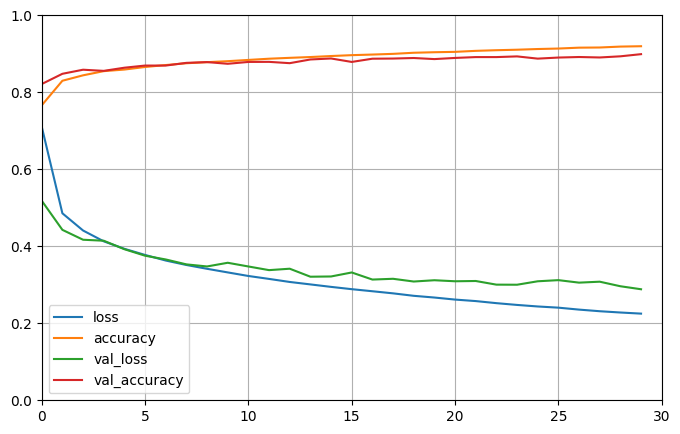

In [32]:
pd.DataFrame(history.history).plot(figsize= (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.gca().set_xlim(0, 30)

plt.show()